# LAB6: Algorytmy grafowe – algorytmy zachłanne dla zagadnienia komiwojażera

# Zadanie 1
Implementacje algorytmów poszukiwania rozwiązania problemu TSP:
* FARIN

In [53]:
from typing import List, Dict, Tuple, Set
import matplotlib.pyplot as plt
import networkx as nx
import copy
edge = Tuple[int, int]
graph = Dict[int, List]
inf = float('inf')

class PathNotFoundError(Exception):
    pass

def FARIN(G: graph, a: List[List[int]], s: int):
    """
    Algorytm Farthest Insertion Heuristik FARIN, rozwiązujący problem komiwojażera(TSP),
    przyjmujący graf "G", listę list wag krawędzi grafu "a" oraz wierzchołek startowy "s"
    Algorytm zwraca krotkę zawierającą cykl Hamiltona i jego sumaryczną wagę
    """
    cost = 0     #inicjalizacja kosztu drogi
    path = [s]      #inicjalizacja listy wierzchołków cyklu Hamiltona, zaczynając od startowego s
    unvisited = set(G.keys()) #zbiór wierzchołków nieodwiedzonych
    unvisited.remove(s) #ze bioru tego usuwamy wierzchołek startowy
    u_prev = s #ustawiamy wierzchołek startowy jako poprzedni
    
    while unvisited: #wykonujemy pętlę główną tak długo jak zostają jakieś wierzchołki do odwiedzenia
        
        #wybór następnego wierzchołka najbardziej odległy lub kilka odległych
        a_row = [inf for _ in range(len(a))] #inicjalizacja listy
        for unv in unvisited:
            a_row[unv-1] = a[u_prev-1][unv-1] #przypisanie wag krawędzi z u_prev do każdego z nieodwiedzonych
        sorted_a = sorted(a_row, reverse=True) #posortowanie
        to_visit = []
        curr_max = -inf
        #wybór najdalszych
        for v in sorted_a:
            #jeżeli wierzchołek nie jest odwiedzony, jego waga != inf oraz jest większy lub równy (kilka o tej samej wadze) 
            if a_row.index(v)+1  in unvisited and v != inf and v >= curr_max:
                curr_max = v
                idx = a_row.index(v)
                a_row[idx] = inf
                to_visit.append(idx+1) #dodanie najdaljszych do listy do odwiedzenia z u_prev
        #rzuca wyjątek jeżeli nie znajdziemy nastepnego wierzchołka do odwiedzenia
        if not to_visit:
            raise PathNotFoundError 
        
        #przejscie przez wierzchołek lub wierzchołkiktóre są najdalej od u_prev        
        for next in to_visit:
            #ilość opcji wstawienia nowego wierzchołka
            places = len(path)
            #ustawienie zmiennych do aktualizowania ścieżki o najlepszym koszcie
            min_cost = inf
            best_cost_path = path
            #iteracja przez możliwości wstawienia wierzchołka
            for i in range(places):
                #skopiowanie dotychczasowej ścieżki
                optional_path = path[:]
                #dodanie nowego wierzcholka na nową pozycję
                optional_path.insert(i+1, next)
                optional_path.append(s)
                
                #obliczenie kosztu nowej opcjonalej ścieżki
                new_cost = 0
                for idx, elem in enumerate(optional_path[:-1]):
                    new_cost += a[elem-1][optional_path[idx+1]-1]
                #jeżeli nowy koszt jest mniejszy bądz równy to aktualizujemy ścieżke
                if min_cost >= new_cost:
                    min_cost = new_cost
                    best_cost_path = optional_path[:-1] 
                
            #aktualizacja ścieżki do tej o najmniejszym koszcie
            path = best_cost_path
            #usunięcie wierzchołka obecnego z nieodwiedzonych 
            unvisited.remove(next)
        #ustawienie wierzchołka ostatnio dodanego na poprzedni
        u_prev = next 
    cost = min_cost #dodanie minimalnego kosztu
    path.append(s) #dodanie wierzchołka początkwoego do domknięcia cyklu Hamiltona
        
    return cost, path

def info_graph(graph, weights, title=''):
    G = nx.DiGraph(graph)
    for u, v in G.edges:
        G.edges[u, v]['weight'] = weights[u-1][v-1]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

Test alorytmu dla przykładu z wykładu

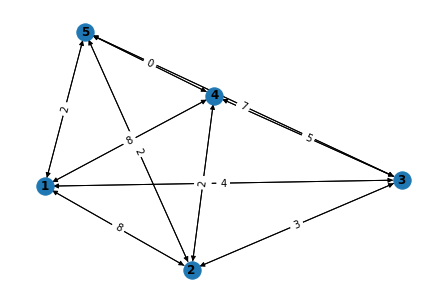

Koszt ścieżki: 16 
Ścieżka: [1, 4, 2, 3, 5, 1]


In [2]:
graph = {
    1: [2,3,4,5],
    2: [1,3,4,5],
    3: [1,2,4,5],
    4: [1,2,3,5],
    5: [1,2,3,4],
}

a = [
    [inf, 5, 4, 6, 6],
    [8, inf, 5, 3, 4],
    [4, 3, inf, 3, 1],
    [8, 2, 5, inf, 6],
    [2, 2, 7, 0, inf]
]
info_graph(graph, a)
cost, path = FARIN(graph, a, 1)
print(f'Koszt ścieżki: {cost} \nŚcieżka: {path}')

# Zadanie 2

* Z punktu widzenia działania algorytmu należy zaznaczyć, że na wynik działania nie ma wpływu skierowanie grafu, gdyż może badany być graf skierowany i nieskierowany, także o wagach ujemnych. Kluczowym faktem jest to, że alogrytmy te są zachłanne przez co nie zawsze możemy otrzymać optymalne rozwiązanie. Rozwiązania będą też różnić się w zależności od wyboru wierzchołka startowego, gydż wtedy analizować będziemy inne przejścia pomiędzy danymi wierzchołkami.
* Kluczową własnościa jest spójność grafu, gdyż dla gradu niespójnego algorytm nie wykona się (nie znajdzie scieżki pomiędzy 2 niespójnymi częściami).

Algorytm poprawnie działający dla grafu skierowanego, spójnego, pełnego z wagami ujmenymi:

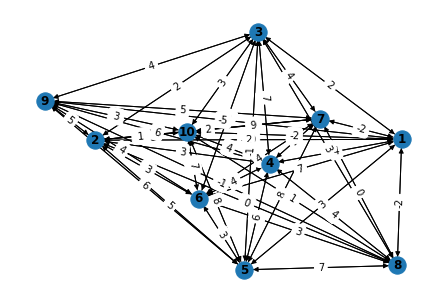

Koszt ścieżki: 1 
Ścieżka: [3, 1, 2, 8, 10, 4, 7, 9, 6, 5, 3]


In [20]:
a = [
    [inf, -10, 1, 3, 4, 6, 6, 0, 9, 5], 
    [2, inf, 2, 3, 3, -1, 5, -2, 8, 10], 
    [2, 2, inf, 7, -1, 3, 4, 1, 2, 5], 
    [4, 3, 7, inf, 6, 4, 4, 4, 5, 4], 
    [3, 5, -1, 6, inf, 3, 4, 5, 2 ,1], 
    [7, 3, 2, 4, 3, inf, 3, 3, 7, 10], 
    [-2, 2, 4, 5, 8, 4, inf, 1, 2, -2],
    [-2, 0, 3, 4, 7, 3, 0, inf, 3, -5],
    [-5, 5, 4, 6, 6, 4, 5, -1, inf, -2],
    [-2, 1, 3, 4, 8, 7, 9, 1, 3, inf]
    ] 
graph = {
    1: [2,3,4,5,6,7,8,9,10],
    2: [1,3,4,5,6,7,8,9,10],
    3: [1,2,4,5,6,7,8,9,10],
    4: [1,2,3,5,6,7,8,9,10],
    5: [1,2,3,4,6,7,8,9,10],
    6: [1,2,3,4,5,7,8,9,10],
    7: [1,2,3,4,5,6,8,9,10],
    8: [1,2,3,4,5,6,7,9,10],
    9: [1,2,3,4,5,6,7,8,10],
    10: [1,2,3,4,5,6,7,8,9]
}
info_graph(graph, a)
cost, path = FARIN(graph, a, 3)
print(f'Koszt ścieżki: {cost} \nŚcieżka: {path}')

Algorytm poprawnie działający dla grafu skierowanego, spójnego, niepełnego:

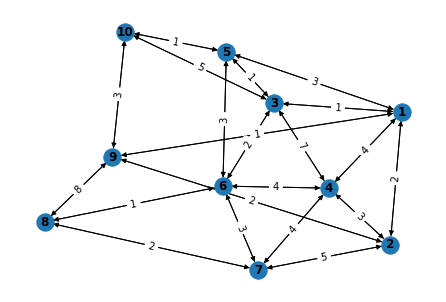

Koszt ścieżki: 31 
Ścieżka: [8, 9, 10, 5, 3, 1, 4, 2, 7, 6, 8]


In [54]:
graph = { 
    1: [2, 3, 4, 5,9], 
    2: [1, 4, 7,9], 
    3: [1, 4, 5, 6,10], 
    4: [1, 2, 3, 6, 7], 
    5: [1, 3, 6, 10], 
    6: [3, 4, 5, 7,8], 
    7: [2, 4, 6,8],
    8: [6,7,9],
    9: [1,2,8, 10],
    10: [3,5,9]
} 
 
a = [
    [inf, 2, 1, 4, 3, inf, inf,inf, 0,inf], 
    [2, inf, inf, 3, inf, inf, 5,inf, 1,inf], 
    [1, inf, inf, 7, 5, 2, inf,inf, inf, 3], 
    [4, 3, 7, inf, inf, 4, 8, inf, inf, inf], 
    [3, inf, 1, inf, inf, 3, inf, inf, inf, 8], 
    [inf, inf, 2, 4, 3, inf, 6, 1, inf, inf], 
    [inf, 5, inf, 4, inf, 3, inf, 2, inf, inf],
    [inf, inf, inf, inf, inf, 1, 2, inf, 9,inf],
    [1, 2, inf, inf, inf, inf,inf, 8,inf, 3],
    [inf, inf, 5, inf, 1, inf,inf, inf,3, inf]
    ]
info_graph(graph, a)
cost, path = FARIN(graph, a, 8)
print(f'Koszt ścieżki: {cost} \nŚcieżka: {path}')

Przypadek grafu skierowanego, niepełnego, dla którego algorytm rzuci wyjątek, gdyż na liście sąsiedztwa jedengo z wierzchołków, wszystkie wierzchołki zostały już odwiedzone lub nie istnieją już inne krawędzie przez co algorytm nie może wybrać kolejnego najdalej położonego wierzchołka. Konkretnie jest to wierzchołek 2, dla którego możliwe do odwiedzenia są wirzchołki 1,4 i 7, lecz wszytskie już zostaną odwiedzone zanim wierzchołek 2 będzie analizowany.

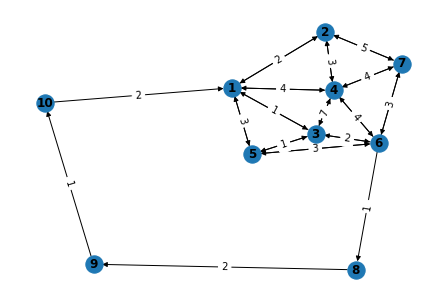

Brak ścieżki z zadanego wierzchołka


In [55]:
graph = { 
    1: [2, 3, 4, 5], 
    2: [1, 4, 7], 
    3: [1, 4, 5, 6], 
    4: [1, 2, 3, 6, 7], 
    5: [1, 3, 6], 
    6: [3, 4, 5, 7,8], 
    7: [2, 4, 6],
    8: [9],
    9: [10],
    10: [1],
} 
 
a = [
    [inf, 2, 1, 4, 3, inf, inf,inf,inf,inf], 
    [2, inf, inf, 3, inf, inf, 5,inf,inf,inf], 
    [1, inf, inf, 7, 1, 2, inf,inf,inf,inf], 
    [4, 3, 7, inf, inf, 4, 4,inf,inf,inf], 
    [3, inf, 1, inf, inf, 3, inf,inf,inf,inf], 
    [inf, inf, 2, 4, 3, inf, 3,1,inf,inf], 
    [inf, 5, inf, 4, inf, 3, inf,inf,inf,inf],
    [inf, inf, inf, inf, inf, inf, inf,inf,2,inf],
    [inf,inf, inf, inf, inf, inf, inf,inf,inf,1],
    [2, inf, inf, inf, inf, inf, inf,inf,inf,inf]
    ]


try:
    info_graph(graph, a)
    cost, path = FARIN(graph, a, 1)
    print(f'Koszt ścieżki: {cost} \nŚcieżka: {path}')
except PathNotFoundError:
    print('Brak ścieżki z zadanego wierzchołka')

# Zadanie 3

Algorytmy FARIN/NEARIN mają oba złożność O(n<sup>2</sup>), gdyż dla każdego kolejnego wierzchołka do odwiedzenia najdujemy dla niego otymalne miejsce na liście już odwiedzonych wierzchołków, więc mamy do czynienia z pętlą w pętli.

Różnice w stosunku do powyższego algorytmu:

1. Alorytm G-TSP - złożoność O(n<sup>2</sup>logn), porządkuje krawędzie w niemalejący ciąg, wybiera te o najmniejszej wadze i dodaje ją do rozwiązania jeżeli jeszcze nie wszytskie krawędzie były odwiedzone oraz jeżeli dodanie tej krawędzi nie spowoduje powstania cyklu

2. Alorytm najbliższego sąsiada NN - m złożoność obliczeniowa taka sama jak FARIN, lecz rozwiązania otzymywane mogą nie być optymane, ponieważ brany pod uwagę jest tylko bieżący wierzchołek i krawędź, która jest o najmniejszej wadze do jeszcze nieodwiedzonego wierzchołka.

3. Algorytm 2-opt / 3-opt - losowo tworzy rozwiązanie początkowe TSP, następnie sprawdza czy usuwanie z niego k krawędzi i zastąpienie ich innymi,tak aby cykl był wciąż prawidłowy, jest tańsze od poprzednio wyznaczonego rozwiązania. Jeżeli zmodyfikowana sekwencja jest lepsza zostaje zapamiętana, a następnie po raz kolejny modyfikowany jest cykl początkowy z usuwaniem kolejnych k krawędzi i porównywane jest w tym najtańszym do tej pory. Złożoność każdego korku jest na poziomie
O(k!)

4. Algorytm Christofidesa - złożoność O(n<sup>3</sup>), najpierw tworzy minimalne drzewo rozpinające, następnie dla wierzchołków o nieparzystym stopniu w tym drzewie tworzymy minimalne skojarzenie dokskonałe. Kolejnym etapem jest wyznaczenie cyklu Eulera w tym multigrafie utworzonym z drzewa oraz minimalnego skojarzenia, a jest to możliwe dlatego, że graf ten jest eulerowski, czyli posiada wszytskie wierzchołki parzsytaego stopnia. Następnie cykl Eulera przekształcany jest w cykl Hamiltona, poprzez pomijanie odwiedzonych wierzchołków


